<a href="https://colab.research.google.com/github/Auta01/Tensorflow-cases/blob/main/Creating%20CNN%20for%20image%20clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train , y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [12]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [34]:
y_train = y_train.reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [35]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [36]:
classes[4]

'deer'

In [40]:
def plot_sample(x,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

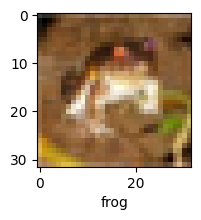

In [41]:
 plot_sample(x_train,y_train,0)

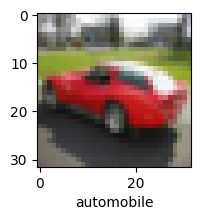

In [46]:
plot_sample(x_train , y_train,255)

In [50]:
x_train = x_train/255
x_test = x_test/255

In [51]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation = 'sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [53]:
ann.compile(optimizer='SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(x_train,y_train, epochs =5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.3086 - loss: 1.9205
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 76ms/step - accuracy: 0.4193 - loss: 1.6409
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 117s 75ms/step - accuracy: 0.4526 - loss: 1.5511
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 116s 74ms/step - accuracy: 0.4754 - loss: 1.4833
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.4988 - loss: 1.4372


In [55]:
ann.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.4371 - loss: 1.5808


[1.5878387689590454, 0.43369999527931213]

In [57]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element)for element in y_pred]

print('classification Report: \n ', classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step
classification Report: 
                precision    recall  f1-score   support

           0       0.67      0.39      0.49      1000
           1       0.65      0.59      0.62      1000
           2       0.42      0.31      0.35      1000
           3       0.40      0.21      0.28      1000
           4       0.47      0.33      0.39      1000
           5       0.43      0.30      0.35      1000
           6       0.64      0.29      0.40      1000
           7       0.24      0.88      0.38      1000
           8       0.62      0.59      0.61      1000
           9       0.59      0.44      0.51      1000

    accuracy                           0.43     10000
   macro avg       0.51      0.43      0.44     10000
weighted avg       0.51      0.43      0.44     10000



In [63]:
cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters =64, kernel_size =(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation ='relu'),
    layers.Dense(10, activation = 'softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
cnn.compile(optimizer='adam',
            loss ='sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [66]:
cnn.fit(x_train,y_train,epochs =10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 43ms/step - accuracy: 0.3668 - loss: 1.7253
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.5974 - loss: 1.1517
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.6550 - loss: 0.9994
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.6854 - loss: 0.9129
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 47ms/step - accuracy: 0.7033 - loss: 0.8575
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 38ms/step - accuracy: 0.7209 - loss: 0.8048
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 39ms/step - accuracy: 0.7348 - loss: 0.7733
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.7506 - loss: 0.7176
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 38ms/step - accuracy: 0.7582 - loss: 0.6956
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 38ms/step - accuracy: 0.7744 - loss: 0.6525


In [67]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7107 - loss: 0.8657


[0.8679673075675964, 0.7095999717712402]

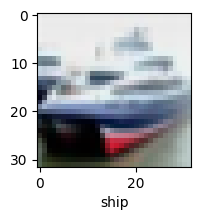

In [68]:
y_test = y_test.reshape(-1,)
y_test[:5]
plot_sample(x_test,y_test,1)

In [69]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


array([[2.29338955e-04, 1.33479825e-05, 2.08360073e-03, 9.02918756e-01,
        3.32419062e-04, 7.56299868e-02, 1.71160698e-03, 2.27534365e-05,
        1.67795215e-02, 2.78676889e-04],
       [1.67334616e-01, 1.96525026e-02, 1.41801138e-04, 4.65926307e-04,
        3.73440889e-06, 1.13908409e-05, 2.01852799e-06, 4.84906877e-06,
        8.11896324e-01, 4.86854464e-04],
       [2.83410996e-01, 1.19253516e-01, 2.24611955e-03, 6.19313344e-02,
        3.53067415e-03, 3.58180515e-03, 2.99478439e-03, 1.57136738e-03,
        4.26949322e-01, 9.45301652e-02],
       [9.02159929e-01, 4.16912884e-03, 5.56339137e-03, 8.97793006e-03,
        3.52345384e-03, 1.53712448e-04, 8.38876178e-04, 5.41434019e-05,
        7.40825310e-02, 4.76830115e-04],
       [2.93902431e-05, 3.11608092e-05, 5.18724807e-02, 5.11642694e-02,
        4.64779407e-01, 2.96917185e-03, 4.28949565e-01, 9.35342032e-05,
        1.08868800e-04, 2.16758326e-06]], dtype=float32)

In [71]:
y_classes =[np.argmax(element)for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(4)]

In [72]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

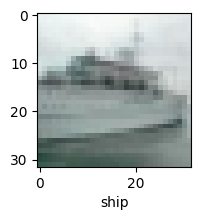

In [77]:
plot_sample(x_test,y_test,80)

In [74]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [78]:
classes[y_classes[80]]

'ship'

In [82]:
print('classification Report ', classification_report(y_test, y_classes))

classification Report                precision    recall  f1-score   support

           0       0.74      0.72      0.73      1000
           1       0.90      0.76      0.83      1000
           2       0.61      0.59      0.60      1000
           3       0.53      0.51      0.52      1000
           4       0.66      0.66      0.66      1000
           5       0.63      0.60      0.61      1000
           6       0.75      0.80      0.77      1000
           7       0.71      0.80      0.75      1000
           8       0.79      0.83      0.81      1000
           9       0.80      0.82      0.81      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000

